In [1]:
%matplotlib inline

import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split

In [2]:
# Define the competition scorer
def competition_scorer(y_true, y_pred):
    return log_loss(y_true, y_pred, sample_weight=10**y_true)

# 1- Information about the challenge

In this challenge, the `requests` dataset contains information about the requests made by group of individuals (or family) to the french emergency housing public service. A sample of the `requests` dataset corresponds to a unique request.

The goal is to predict the categorical variable `granted_number_of_nights` which represents the number of nights of emergency housing granted to a group. You can train your model on the `train_requests`, the predictions should be made for requests listed in the `test_requests` dataset.

The evaluation metric is given by the `competition_scorer` defined above. It corresponds to a weighted log-loss with weights 1, 10, 100, or 1000 if the `granted_number_of_nights` takes the value 0, 1, 2, or 3 respectively. Thus beware that you will be penalized harder for classification mistakes made on the higher labels.

Good luck!

# 2- Load the datasets

In [3]:
# Train sample
requests_train = pd.read_csv('data/train_requests.csv', sep=',', low_memory=False, error_bad_lines=False)

# Test sample
requests_test = pd.read_csv('data/test_requests.csv', sep=',', low_memory=False, error_bad_lines=False)

b'Skipping line 31303: expected 24 fields, saw 49\nSkipping line 75954: expected 24 fields, saw 49\n'


In [4]:
individuals_train = pd.read_csv('data/train_individuals.csv', sep=',', low_memory=False, error_bad_lines=False)
individuals_test = pd.read_csv('data/test_individuals.csv', sep=',', low_memory=False, error_bad_lines=False)

In [48]:
requests_train.head()

,request_id,animal_presence,answer_creation_date,child_situation,child_to_come,district,granted_number_of_nights,group_composition_id,group_composition_label,group_creation_date,...,housing_situation_label,long_term_housing_request,number_of_underage,request_backoffice_creator_id,request_creation_date,requester_type,social_situation_id,town,victim_of_violence,victim_of_violence_type
0,130667d2964de43c511d0ead7ac66b33,f,2019-02-11 22:30:00,-1,NaN,85,1,10,man alone,2018-05-03 12:10:40.416,...,other,NaN,-1,eecd6110b7e9157e6423428b22a28159,2019-02-11 22:30:00,third party,9a84febc47fedaf2c81d7c755e9edc85,NaN,f,NaN
1,b1cd62fcf24eebb0f685d5eaf55317a8,f,2019-02-12 09:00:00,-1,NaN,85,1,10,man alone,2019-03-07 12:11:08.545,...,other,NaN,-1,eecd6110b7e9157e6423428b22a28159,2019-02-12 09:00:00,user,11f64f0547e855c5c59329b9edc63063,NaN,f,NaN
2,12cc0a18890bd4959fe42df3ae58838e,f,2019-02-01 21:00:00,-1,NaN,59,1,80,isolated child/underage,2019-03-13 12:54:15.887,...,street,NaN,-1,686d962128c7622aa79ed91da13f5c77,2019-02-01 21:00:00,user,898ab2883f410f4c6fb042ef16329fbb,NaN,f,NaN
3,ae2d5b4dc181d29e430132f145da1556,f,2019-02-25 15:12:05.037,-1,NaN,50,2,20,woman alone,2018-10-09 14:37:29.773,...,NaN,NaN,-1,ec29519464c381a6630f4e480a0c000e,2019-02-25 15:12:05.037,user,3998c8e890ddc980527dd1af45dfa672,NaN,t,woman
4,d13a17ce36c832514fda2464e11c4a9f,f,2019-02-20 09:59:20.603,-1,NaN,93,2,60,group with child(ren),2018-10-02 10:47:36.931,...,hotel paid by the emergency centre,NaN,-1,c8b5cc926b1d7212224a08baa9619518,2019-02-20 09:59:20.603,user,74a10d96eae43586bc3c46e89719b821,NaN,f,NaN


In [17]:
individuals_train.head()

,request_id,individual_id,housing_situation_2_id,housing_situation_2_label,birth_month,birth_year,childcare_center_supervision,disabled_worker_certification,gender,individual_creation_date,individual_role,individual_role_2_id,individual_role_2_label,marital_status_id,marital_status_label,pregnancy
0,130667d2964de43c511d0ead7ac66b33,b24a8cfaaf3663bac45ca3bcd24f0b36,20,on the street,5,1977,NaN,NaN,male,2018-01-29,isolated person,30,isolated adult,10,single person,f
1,b1cd62fcf24eebb0f685d5eaf55317a8,eef783d1bda82661a751c12c34aff8c2,20,on the street,5,1980,NaN,NaN,male,2019-03-07,NaN,30,isolated adult,-1,NaN,f
2,12cc0a18890bd4959fe42df3ae58838e,927b6fa58d6be263c411332835b11fec,20,on the street,1,2003,NaN,NaN,male,2019-03-13,NaN,10,isolated underage/child,-1,NaN,f
3,ae2d5b4dc181d29e430132f145da1556,94181d5cf4a56cc84d12677df84e2e03,20,on the street,7,1986,NaN,NaN,female,2018-10-09,NaN,30,isolated adult,-1,NaN,f
4,d13a17ce36c832514fda2464e11c4a9f,e79d2e3f9ace50049f1796c098008c13,35,hotel paid by the emergency structure,9,1980,NaN,NaN,female,2017-06-22,husband/spouse,1,partner,-1,NaN,f


In [19]:
len(individuals_train.loc[:,'individual_id'].unique())

91235

In [58]:
final = train_test.merge(train_test_bis,how='left' , on='request_id')
X_test_final = train_test.merge(train_test_bis, left_on='request_id', right_on='request_id')

NameError: name 'train_test' is not defined

In [59]:
final.shape

(599043, 29)

In [54]:
ntrain=len(requests_train)
requests = pd.concat((requests_train, requests_test), axis=0)
requests=requests.reset_index(drop=True)

C:\Users\kkpakpo\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [57]:
requests.shape, requests_train.shape, requests_test.shape

((371928, 24), (297739, 24), (74189, 23))

In [6]:
ntrain_bis=len(individuals_train)
individuals = pd.concat((individuals_train, individuals_test), axis=0)
individuals=individuals.reset_index(drop=True)

In [65]:
final = requests.merge(individuals.loc[:,['request_id', 'pregnancy', 'childcare_center_supervision', 
                                          'disabled_worker_certification', 'gender', 'marital_status_id']].drop_duplicates(keep='first'),  
                       on='request_id')

In [67]:
final.shape

(535471, 29)

In [4]:
# Inspect basic metadata about the dataset
requests_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297739 entries, 0 to 297738
Data columns (total 24 columns):
request_id                       297739 non-null object
animal_presence                  297739 non-null object
answer_creation_date             297739 non-null object
child_situation                  297739 non-null int64
child_to_come                    115453 non-null object
district                         297739 non-null int64
granted_number_of_nights         297739 non-null int64
group_composition_id             297739 non-null int64
group_composition_label          297738 non-null object
group_creation_date              297738 non-null object
group_id                         297739 non-null object
group_main_requester_id          297739 non-null object
group_type                       297738 non-null object
housing_situation_id             297739 non-null int64
housing_situation_label          276802 non-null object
long_term_housing_request        90926 non-null object

In [105]:
len(requests_train.loc[:,'victim_of_violence_type'].unique())

7

In [106]:
requests_train.loc[:,'victim_of_violence_type'].describe()

count      4984
unique        6
top       woman
freq       2700
Name: victim_of_violence_type, dtype: object

In [107]:
set(requests_train.loc[:,'victim_of_violence_type'])

{'child',
 'family',
 'man',
 'man victim of domestic violence',
 nan,
 'woman',
 'woman victim of domestic violence'}

# 3- Distribution of the target

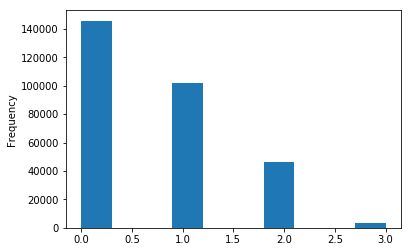

In [5]:
# histogram of the target variable
requests_train['granted_number_of_nights'].plot.hist()
None

# 4-Train and evaluate a first model

In [39]:
# selected columns for explanatory variable
columns = ['district',
           'housing_situation_id',
           'group_composition_id']

X = final.loc[:ntrain, columns]
y = final.loc[ntrain:, 'granted_number_of_nights']

KeyError: "None of [['district', 'housing_situation_id', 'group_composition_id']] are in the [columns]"

In [ ]:
requests[columns].head()

## 4.1. Feature ingeneering

In [66]:
#cat_cols = [col for col in requests_train.columns if requests_train.loc[:,col].dtype == 'O']
#num_cols = [col for col in requests_train.columns if requests_train.loc[0,col].dtype == float]
# cat_cols_high_freq = []
# high freq = >5

In [8]:
cat_cols = ['animal_presence','child_to_come', 'group_type', 'long_term_housing_request', 'requester_type', 
            'victim_of_violence', 'victim_of_violence_type']
num_cols =  ['child_situation', 'district']
cat_cols_high_freq = ['group_composition_id', 'group_id', 'housing_situation_id', 'number_of_underage', 
                      'request_backoffice_creator_id', 'social_situation_id', 'town']
date_cols = ['answer_creation_date', 'group_creation_date', 'request_creation_date']
id_cols = ['group_composition_id']
text_cols = ['group_composition_label', 'housing_situation_label']
unuseful = ['group_main_requester_id']

In [6]:
requests_train.loc[12,cat_cols]

animal_presence                       f
child_to_come                         f
group_type                   individual
long_term_housing_request             t
requester_type                     user
victim_of_violence                    f
victim_of_violence_type             NaN
Name: 12, dtype: object

In [70]:
requests_train['child_to_come'].dtype

dtype('O')

## Preprocess

In [26]:
individuals_cols = ['pregnancy', 'childcare_center_supervision', 'disabled_worker_certification', 'gender', 'marital_status_id']

In [27]:
columns = num_cols + cat_cols + cat_cols_high_freq + individuals_cols

In [28]:
#X = requests_train[columns].fillna('xxx')
#y = requests_train['granted_number_of_nights']
#X = final[columns].fillna('xxx')
#y = final['granted_number_of_nights']
X = final.loc[:ntrain, columns].fillna('xxx')
y = final.loc[:ntrain, 'granted_number_of_nights']

In [29]:
X.loc[:, cat_cols + cat_cols_high_freq + individuals_cols] = \
X.loc[:, cat_cols + cat_cols_high_freq + individuals_cols].apply(lambda col: col.astype('category'))

# Cross validation

In [56]:
# split between the train and the validation samples
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=37)

ValueError: Found input variables with inconsistent numbers of samples: [297740, 301304]

## 4.1. Model: Logistic regression

In [121]:
# use logistic regression as first model
model = LogisticRegression(solver='liblinear', multi_class='ovr')

In [9]:
# fit the model
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [10]:
# evaluate the model with the competition scorer (validation set)
competition_scorer(y_val, model.predict_proba(X_val))

2.528223300408609

## 4.2. LightGBM

In [14]:
from lightgbm import LGBMClassifier

In [15]:
lgbm = LGBMClassifier(n_jobs=-1, random_state=2019, class_weight='balanced')

Cross val

In [137]:
from sklearn.model_selection import GridSearchCV   

In [138]:
gridParams = {
    #'learning_rate': [0.005],
    'n_estimators': [10,20,30, 40, 50, 60, 70, 80,90, 100, 110,120,130,140,150,160,170,180,190, 200],
    #'num_leaves': [6,8,12,16],
    #'boosting_type' : ['gbdt'],
    #'objective' : ['binary'],
    #'random_state' : [2019], # Updated from 'seed'
    #'colsample_bytree' : [0.65, 0.66],
    #'subsample' : [0.7,0.75],
    #'reg_alpha' : [1,1.2],
    #'reg_lambda' : [1,1.2,1.4],
    }
#gridParams= {'n_estimators':list(int(10*i) for i in range(0,20))}


In [ ]:
# To view the default model params:
print(lgbm.get_params().keys())

# Create the grid
grid = GridSearchCV(lgbm, gridParams,
                    verbose=0,
                    cv=4,
                    n_jobs=-1)
# Run the grid
grid.fit(X_train, y_train)

# Print the best parameters found
print(grid.best_params_)
print(grid.best_score_)

dict_keys(['boosting_type', 'class_weight', 'colsample_bytree', 'importance_type', 'learning_rate', 'max_depth', 'min_child_samples', 'min_child_weight', 'min_split_gain', 'n_estimators', 'n_jobs', 'num_leaves', 'objective', 'random_state', 'reg_alpha', 'reg_lambda', 'silent', 'subsample', 'subsample_for_bin', 'subsample_freq'])


In [65]:
lgbm.fit(X_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight='balanced',
        colsample_bytree=1.0, importance_type='split', learning_rate=0.1,
        max_depth=-1, min_child_samples=20, min_child_weight=0.001,
        min_split_gain=0.0, n_estimators=100, n_jobs=-1, num_leaves=31,
        objective=None, random_state=2019, reg_alpha=0.0, reg_lambda=0.0,
        silent=True, subsample=1.0, subsample_for_bin=200000,
        subsample_freq=0)

In [29]:
competition_scorer(y_val,lgbm.predict_proba(X_val))

0.5504323089660205

In [30]:
lgbm.fit(X, y)

LGBMClassifier(boosting_type='gbdt', class_weight='balanced',
        colsample_bytree=1.0, importance_type='split', learning_rate=0.1,
        max_depth=-1, min_child_samples=20, min_child_weight=0.001,
        min_split_gain=0.0, n_estimators=100, n_jobs=-1, num_leaves=31,
        objective=None, random_state=2019, reg_alpha=0.0, reg_lambda=0.0,
        silent=True, subsample=1.0, subsample_for_bin=200000,
        subsample_freq=0)

Predict

In [31]:
#X_test = X_test_final[columns]
X_test = final.loc[ntrain:, columns]
X_test.loc[:, cat_cols + cat_cols_high_freq + individuals_cols] = \
X_test.loc[:, cat_cols + cat_cols_high_freq + individuals_cols].apply(lambda col: col.astype('category'))

In [32]:
y_pred = lgbm.predict_proba(X_test)

In [44]:
len(final.loc[ntrain:,'request_id'])

301304

In [45]:
len(y_pred)

301304

In [46]:
import pandas as pd

In [48]:
pd.concat([final.loc[ntrain:,'request_id'].reset_index(drop=True), pd.DataFrame(y_pred).reset_index(drop=True)], axis=1)

,request_id,0,1,2,3
0,044c3facf1b4fc28bf75282c92f7e4f3,0.011873,0.285465,0.697550,0.005111
1,11889048b1a063f46ca4421a58e8f4ae,0.158385,0.724068,0.103997,0.013549
2,202e294bb5ce10984b57053965f53804,0.460291,0.532717,0.003335,0.003657
3,9471898744f674c7ca28764205ee2f73,0.019659,0.947312,0.032390,0.000640
4,4b8e24bf8cfabb638ff164ab0ecae525,0.071898,0.903743,0.021108,0.003251
5,b38c10450cb60ff64a2eb88020526b3e,0.001015,0.996398,0.001089,0.001497
6,29b706178960cf66079e2d22f69b8d5d,0.009787,0.964315,0.005827,0.020071
7,29b706178960cf66079e2d22f69b8d5d,0.009787,0.964315,0.005827,0.020071
8,29b706178960cf66079e2d22f69b8d5d,0.009787,0.964315,0.005827,0.020071
9,29b706178960cf66079e2d22f69b8d5d,0.009805,0.966023,0.005837,0.018335


In [49]:
predictions = pd.concat([final.loc[ntrain:,'request_id'].reset_index(drop=True), pd.DataFrame(y_pred).reset_index(drop=True)], axis=1)

In [50]:
predictions.head()

,request_id,0,1,2,3
0,044c3facf1b4fc28bf75282c92f7e4f3,0.011873,0.285465,0.697550,0.005111
1,11889048b1a063f46ca4421a58e8f4ae,0.158385,0.724068,0.103997,0.013549
2,202e294bb5ce10984b57053965f53804,0.460291,0.532717,0.003335,0.003657
3,9471898744f674c7ca28764205ee2f73,0.019659,0.947312,0.032390,0.000640
4,4b8e24bf8cfabb638ff164ab0ecae525,0.071898,0.903743,0.021108,0.003251


# 5- Compute predictions on the test set 

In [11]:
# use the model to predict on the test set
X_test = requests_test[columns]
y_pred = model.predict_proba(X_test)

In [12]:
# overview of prediction probabilities for first four rows
y_pred[:4]

array([[0.22960076, 0.50023437, 0.24644989, 0.02371499],
       [0.70313075, 0.20287465, 0.08815599, 0.00583861],
       [0.23010885, 0.47292815, 0.27021553, 0.02674747],
       [0.69742411, 0.16724207, 0.12698437, 0.00834945]])

In [13]:
predictions = pd.concat([requests_test['request_id'], pd.DataFrame(y_pred)], axis=1)

In [37]:
predictions.head()

,request_id,0,1,2,3
0,NaN,0.011873,0.285465,0.697550,0.005111
1,NaN,0.158385,0.724068,0.103997,0.013549
2,NaN,0.460291,0.532717,0.003335,0.003657
3,NaN,0.019659,0.947312,0.032390,0.000640
4,NaN,0.071898,0.903743,0.021108,0.003251


# 6- Submit your predictions to the QScore platform

In [51]:
import io, math, requests

# Get your token from qscore:
# 1. Go to https://qscore.datascience-olympics.com/
# 2. Chose the competition Data Science Olympics 2019
# 3. In the left menu click 'Submissions'
# 4. Your token is in the 'Submit from your Python Notebook' tab

def submit_prediction(df, sep=',', comment='', compression='gzip', **kwargs):
    TOKEN = 'f1f124332514ab749d3c55454c005e516e0c806c6e2848fecc54d5cabe7b2402a7dfcd86d68b86d4e349294e78ef86aab724c1975a82f3c8996cc9697c13f787'
    URL='https://qscore.datascience-olympics.com/api/submissions'
    df.to_csv('temporary.dat', sep=sep, compression=compression, **kwargs)
    r = requests.post(URL, headers={'Authorization': 'Bearer {}'.format(TOKEN)},files={'datafile': open('temporary.dat', 'rb')},data={'comment':comment, 'compression': compression})
    if r.status_code == 429:
        raise Exception('Submissions are too close. Next submission is only allowed in {} seconds.'.format(int(math.ceil(int(r.headers['x-rate-limit-remaining']) / 1000.0))))
    if r.status_code != 200:
        raise Exception(r.text)

In [52]:
submit_prediction(predictions, sep=',', index=False, comment='my submission')